# Market Reaction to US Nonfarm payrolls release

In [1]:
import tradingeconomics as te
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta, date
import plotly.graph_objects as go

In [2]:
te.login()

'You are logged in as a jupyter:jupyter'

### Getting US Non Farm Payroll historical symbol

In [3]:
us_non_farm_payroll = te.getIndicatorData(country='united states', output_type='df')

In [4]:
us_non_farm_payroll[['Category','HistoricalDataSymbol']].query('Category == "Non Farm Payrolls"')

,Category,HistoricalDataSymbol
220,Non Farm Payrolls,NFP TCH


### Getting Historical Data

#### Forecast

In [5]:
us_non_farm_payroll_forecast = te.getForecastByTicker(ticker= 'NFP TCH', output_type='df')

https://api.tradingeconomics.com/forecast/ticker/NFP%20TCH?c=jupyter:jupyter


In [6]:
us_non_farm_payroll_forecast

,Country,Category,Title,LatestValue,LatestValueDate,q1,q2,q3,q4,YearEnd,YearEnd2,YearEnd3,q1_date,q2_date,q3_date,q4_date,Frequency,HistoricalDataSymbol
0,United States,Non Farm Payrolls,United States Non Farm Payrolls,531.0,2021-10-31T00:00:00,550.0,350.0,500.0,400.0,550.0,280.0,280.0,2021-12-31T00:00:00,2022-03-31T00:00:00,2022-06-30T00:00:00,2022-09-30T00:00:00,Monthly,NFP TCH


### Us non farm payroll Historical data

In [7]:
us_non_farm_payroll_historical = te.getHistoricalByTicker(ticker = 'NFP TCH', start_date = '2021-01-01',output_type='df')  

In [8]:
us_non_farm_payroll_historical

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Non Farm Payrolls,2021-01-31T00:00:00,233.0,Monthly,NFP TCH,2021-04-02T12:42:00
1,United States,Non Farm Payrolls,2021-02-28T00:00:00,536.0,Monthly,NFP TCH,2021-05-07T12:37:00
2,United States,Non Farm Payrolls,2021-03-31T00:00:00,785.0,Monthly,NFP TCH,2021-06-04T12:58:00
3,United States,Non Farm Payrolls,2021-04-30T00:00:00,269.0,Monthly,NFP TCH,2021-07-02T12:37:00
4,United States,Non Farm Payrolls,2021-05-31T00:00:00,614.0,Monthly,NFP TCH,2021-08-06T12:39:00
5,United States,Non Farm Payrolls,2021-06-30T00:00:00,962.0,Monthly,NFP TCH,2021-09-03T12:37:00
6,United States,Non Farm Payrolls,2021-07-31T00:00:00,1091.0,Monthly,NFP TCH,2021-10-08T12:54:00
7,United States,Non Farm Payrolls,2021-08-31T00:00:00,483.0,Monthly,NFP TCH,2021-11-05T12:34:00
8,United States,Non Farm Payrolls,2021-09-30T00:00:00,312.0,Monthly,NFP TCH,2021-11-05T12:30:00
9,United States,Non Farm Payrolls,2021-10-31T00:00:00,531.0,Monthly,NFP TCH,2021-11-05T12:30:00


In [9]:
us_non_farm_09_10_11_20201 = us_non_farm_payroll_historical[['Value','LastUpdate']][5:10]

In [10]:
us_non_farm_09_10_11_20201

,Value,LastUpdate
5,962.0,2021-09-03T12:37:00
6,1091.0,2021-10-08T12:54:00
7,483.0,2021-11-05T12:34:00
8,312.0,2021-11-05T12:30:00
9,531.0,2021-11-05T12:30:00


In [11]:
us_non_farm_09_10_11_20201 = us_non_farm_09_10_11_20201.drop(index=[7,8])

In [12]:
us_non_farm_09_10_11_20201['forecast'] = [1,2,3]

In [13]:
us_non_farm_09_10_11_20201

,Value,LastUpdate,forecast
5,962.0,2021-09-03T12:37:00,1
6,1091.0,2021-10-08T12:54:00,2
9,531.0,2021-11-05T12:30:00,3


In [14]:
us_indexes = te.getMarketsData(marketsField = 'index', output_type = 'df')

In [15]:
us_indexes = us_indexes[['Symbol','Country']].query('Country == "United States"')
us_indexes_list = us_indexes.Symbol.to_list()
us_indexes_list

['W5000:IND',
 'CCMP:IND',
 'MID:IND',
 'RTY:IND',
 'VIX:IND',
 'INDU:IND',
 'SPX:IND',
 'NDX:IND']

## Reactions at September 2021 

### Euro Usd Reaction

In [16]:
eur_usd_intraday = te.getMarketsIntraday(symbols = ['eurusd:cur'], initDate='2021-09-03', endDate='2021-09-04', output_type = 'df')

In [17]:
eur_usd_intraday.query('Date == "2021-09-03T12:00:00"')

,Symbol,Date,Open,High,Low,Close
521,EURUSD:CUR,2021-09-03T12:00:00,1.18736,1.18736,1.18703,1.18716


In [18]:
eur_usd_intraday.query('Date == "2021-09-03T13:00:00"')

,Symbol,Date,Open,High,Low,Close
461,EURUSD:CUR,2021-09-03T13:00:00,1.18914,1.18937,1.18894,1.18912


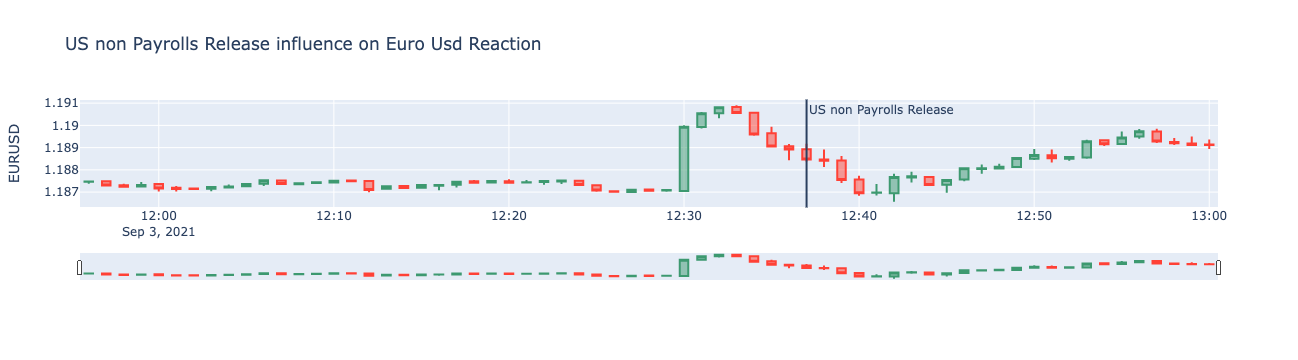

In [19]:
df1 = eur_usd_intraday[461:526]

fig = go.Figure(data=[go.Candlestick(x=df1['Date'],
                open=df1['Open'], high=df1['High'],
                low=df1['Low'], close=df1['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on Euro Usd Reaction',
    yaxis_title='EURUSD',
    shapes = [dict(
        x0='2021-09-03T12:37:00', x1='2021-09-03T12:37:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-09-03T12:37:00', y=1.00, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

### Dow Jones Industrial Average Reaction

In [20]:
indu_ind_intraday = te.getMarketsIntraday(symbols = ['indu:ind'], initDate='2021-09-03', endDate='2021-09-04', output_type = 'df')

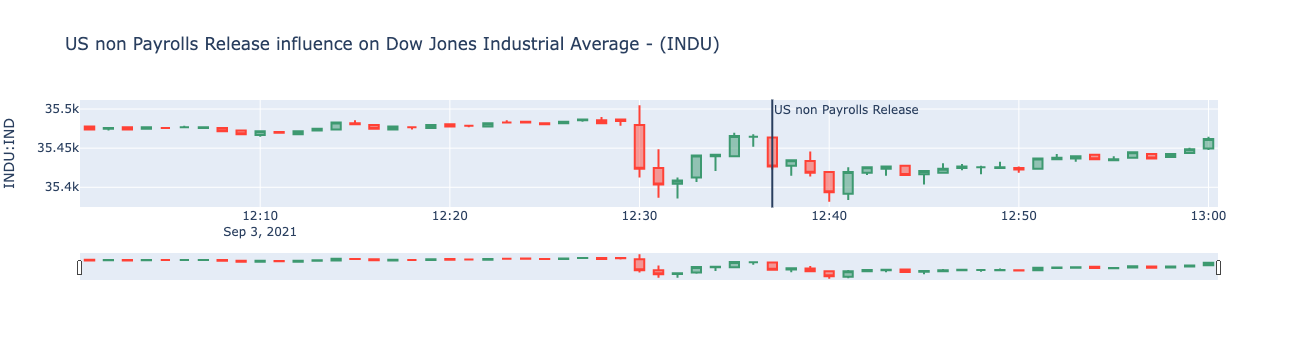

In [21]:

df2 = indu_ind_intraday[466:526]

fig = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['Open'], high=df2['High'],
                low=df2['Low'], close=df2['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on Dow Jones Industrial Average - (INDU)',
    yaxis_title='INDU:IND',
    shapes = [dict(
        x0='2021-09-03T12:37:00', x1='2021-09-03T12:37:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-09-03T12:37:00', y=1.00, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

### S&P 500 Reaction 

In [22]:
s_p_intraday = te.getMarketsIntraday(symbols = ['SPX:IND'], initDate='2021-09-03', endDate='2021-09-04', output_type = 'df')

In [23]:
s_p_intraday.query('Date == "2021-09-03T12:00:00"')

,Symbol,Date,Open,High,Low,Close
527,SPX:IND,2021-09-03T12:00:00,4543.4502,4543.7002,4543.2002,4543.4502


In [24]:
s_p_intraday.query('Date == "2021-09-03T13:00:00"')

,Symbol,Date,Open,High,Low,Close
470,SPX:IND,2021-09-03T13:00:00,4540.2002,4541.4502,4539.7002,4540.7002


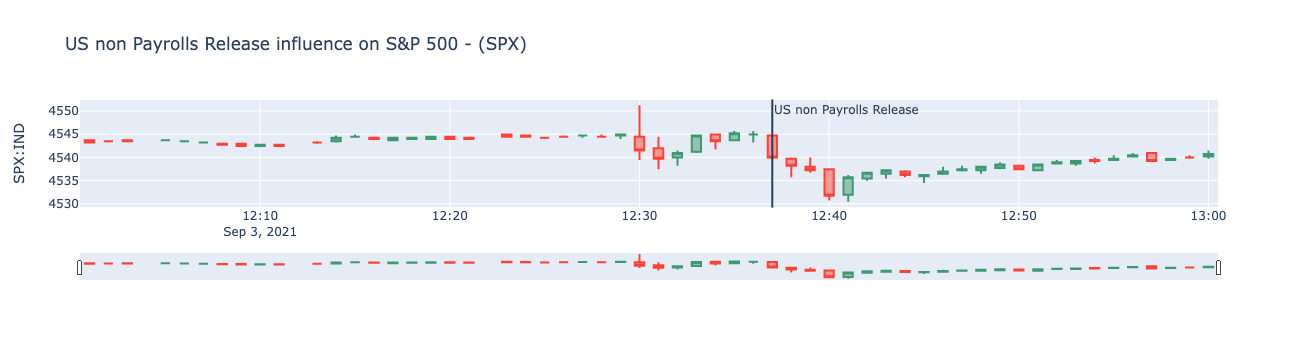

In [25]:

df3 = s_p_intraday[470:527]

fig = go.Figure(data=[go.Candlestick(x=df3['Date'],
                open=df3['Open'], high=df3['High'],
                low=df3['Low'], close=df3['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on S&P 500 - (SPX)',
    yaxis_title='SPX:IND',
    shapes = [dict(
        x0='2021-09-03T12:37:00', x1='2021-09-03T12:37:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-09-03T12:37:00', y=1.00, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

## Reactions at October 2021 

### Euro USD Reaction

In [26]:
eur_usd_intraday = te.getMarketsIntraday(symbols = ['eurusd:cur'], initDate='2021-10-08', endDate='2021-10-09', output_type = 'df')

In [27]:
eur_usd_intraday.query('Date == "2021-10-08T12:30:00"')

,Symbol,Date,Open,High,Low,Close
485,EURUSD:CUR,2021-10-08T12:30:00,1.15649,1.15848,1.15649,1.1576


In [28]:
eur_usd_intraday.query('Date == "2021-10-08T13:30:00"')

,Symbol,Date,Open,High,Low,Close
426,EURUSD:CUR,2021-10-08T13:30:00,1.15648,1.15655,1.15632,1.15633


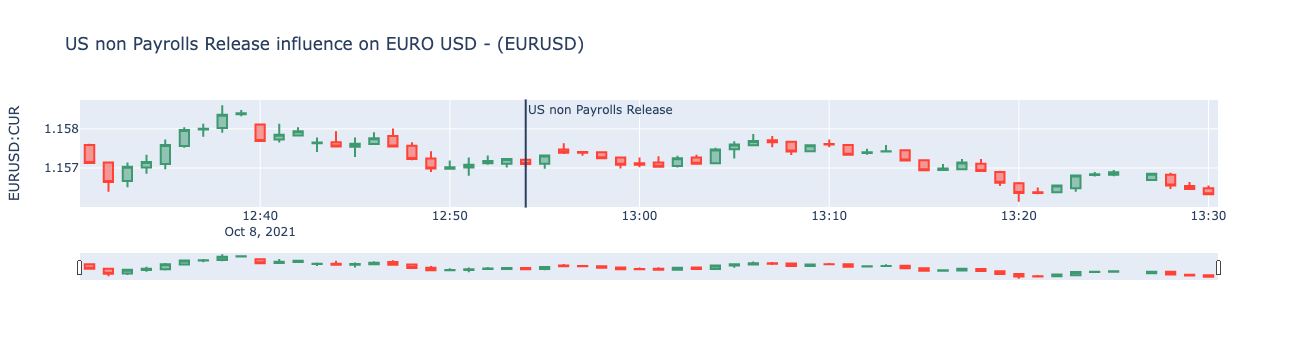

In [29]:

df4 = eur_usd_intraday[426:485]

fig = go.Figure(data=[go.Candlestick(x=df4['Date'],
                open=df4['Open'], high=df4['High'],
                low=df4['Low'], close=df4['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on EURO USD - (EURUSD)',
    yaxis_title='EURUSD:CUR',
    shapes = [dict(
        x0='2021-10-08T12:54:00', x1='2021-10-08T12:54:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-10-08T12:54:00', y=1.00, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

### Dow Jones Industrial Average Reaction

In [30]:
indu_ind_intraday_october = te.getMarketsIntraday(symbols = ['indu:ind'], initDate='2021-10-08', endDate='2021-10-09', output_type = 'df')

In [31]:
indu_ind_intraday_october.query('Date == "2021-10-08T12:30:00"')

,Symbol,Date,Open,High,Low,Close
509,INDU:IND,2021-10-08T12:30:00,34832.91016,34832.91016,34691.41016,34756.64063


In [32]:
indu_ind_intraday_october.query('Date == "2021-10-08T13:30:00"')

,Symbol,Date,Open,High,Low,Close
449,INDU:IND,2021-10-08T13:30:00,34791.76172,34817.85938,34756.64063,34757.64063


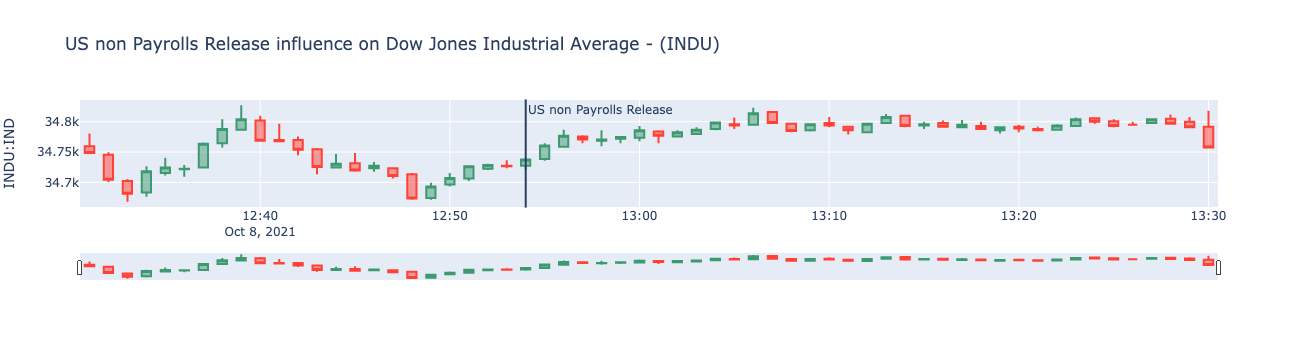

In [33]:

df5 = indu_ind_intraday_october[449:509]

fig = go.Figure(data=[go.Candlestick(x=df5['Date'],
                open=df5['Open'], high=df5['High'],
                low=df5['Low'], close=df5['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on Dow Jones Industrial Average - (INDU)',
    yaxis_title='INDU:IND',
    shapes = [dict(
        x0='2021-10-08T12:54:00', x1='2021-10-08T12:54:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-10-08T12:54:00', y=1.00, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

### S&P 500 Reaction 

In [34]:
s_p_october = te.getMarketsIntraday(symbols = ['SPX:IND'], initDate='2021-10-08', endDate='2021-10-09', output_type = 'df')

In [35]:
s_p_october.query('Date == "2021-10-08T12:30:00"')

,Symbol,Date,Open,High,Low,Close
503,SPX:IND,2021-10-08T12:30:00,4406.72998,4408.74023,4395.20996,4402.72998


In [36]:
s_p_october.query('Date == "2021-10-08T13:30:00"')

,Symbol,Date,Open,High,Low,Close
444,SPX:IND,2021-10-08T13:30:00,4408.49023,4411.49023,4404.72998,4404.97998


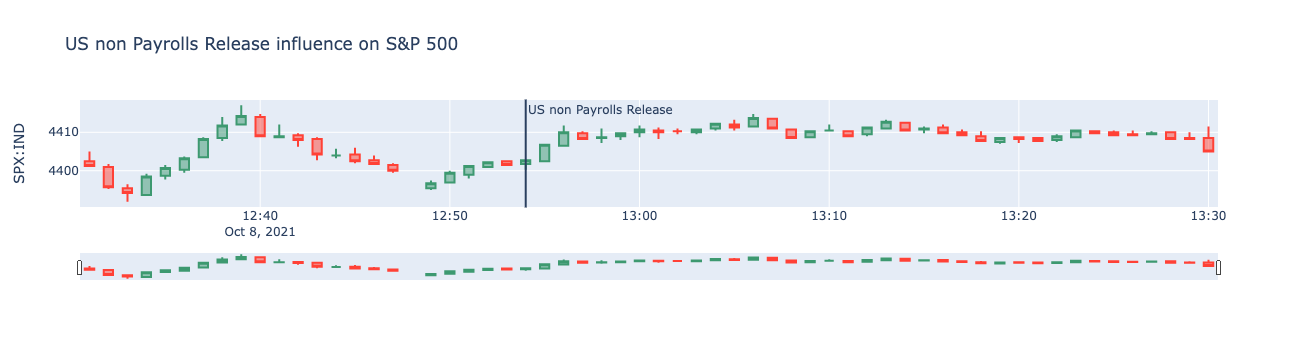

In [37]:

df6 = s_p_october[444:503]

fig = go.Figure(data=[go.Candlestick(x=df6['Date'],
                open=df6['Open'], high=df6['High'],
                low=df6['Low'], close=df6['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on S&P 500',
    yaxis_title='SPX:IND',
    shapes = [dict(
        x0='2021-10-08T12:54:00', x1='2021-10-08T12:54:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-10-08T12:54:00', y=1.00, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

## Reactions at November 2021 

### Euro USD Reaction

In [38]:
eur_usd_intraday_november = te.getMarketsIntraday(symbols = ['eurusd:cur'], initDate='2021-11-05', endDate='2021-11-06', output_type = 'df')

In [39]:
eur_usd_intraday_november.query('Date == "2021-11-05T12:00:00"')

,Symbol,Date,Open,High,Low,Close
526,EURUSD:CUR,2021-11-05T12:00:00,1.15336,1.15339,1.15317,1.15323


In [40]:
eur_usd_intraday_november.query('Date == "2021-11-05T13:00:00"')

,Symbol,Date,Open,High,Low,Close
466,EURUSD:CUR,2021-11-05T13:00:00,1.15142,1.15149,1.15134,1.15135


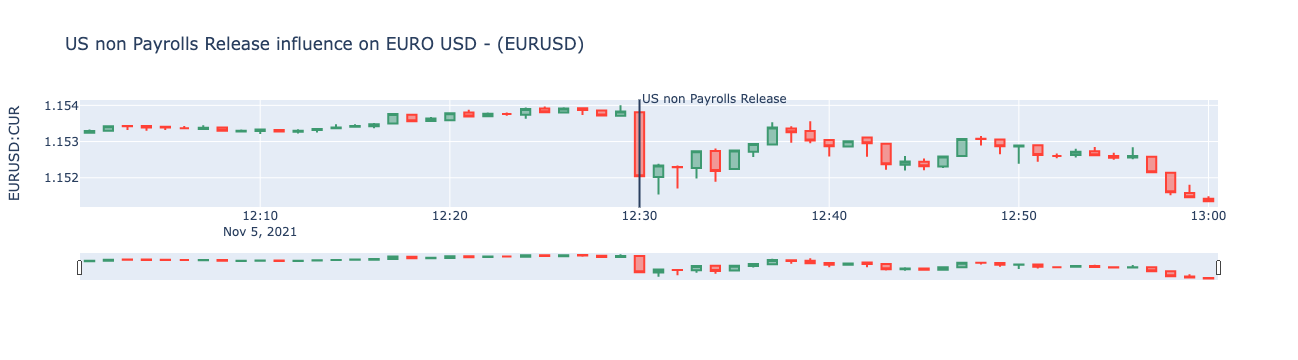

In [41]:

df7 = eur_usd_intraday_november[466:526]

fig1 = go.Figure(data=[go.Candlestick(x=df7['Date'],
                open=df7['Open'], high=df7['High'],
                low=df7['Low'], close=df7['Close'])
                      ])

fig1.update_layout(
    title='US non Payrolls Release influence on EURO USD - (EURUSD)',
    yaxis_title='EURUSD:CUR',
    shapes = [dict(
        x0='2021-11-05T12:30:00', x1='2021-11-05T12:30:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-11-05T12:30:00', y=1.10, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig1.show(renderer='plotly_mimetype')

### Dow Jones Industrial Average Reaction

In [42]:
indu_intraday_november = te.getMarketsIntraday(symbols = ['indu:ind'], initDate='2021-11-05', endDate='2021-11-06', output_type = 'df')

In [43]:
indu_intraday_november.query('Date == "2021-11-05T12:00:00"')

,Symbol,Date,Open,High,Low,Close
535,INDU:IND,2021-11-05T12:00:00,36169.08984,36172.10156,36167.07813,36169.08984


In [44]:
indu_intraday_november.query('Date == "2021-11-05T13:00:00"')

,Symbol,Date,Open,High,Low,Close
475,INDU:IND,2021-11-05T13:00:00,36265.39844,36270.42188,36261.39063,36263.39063


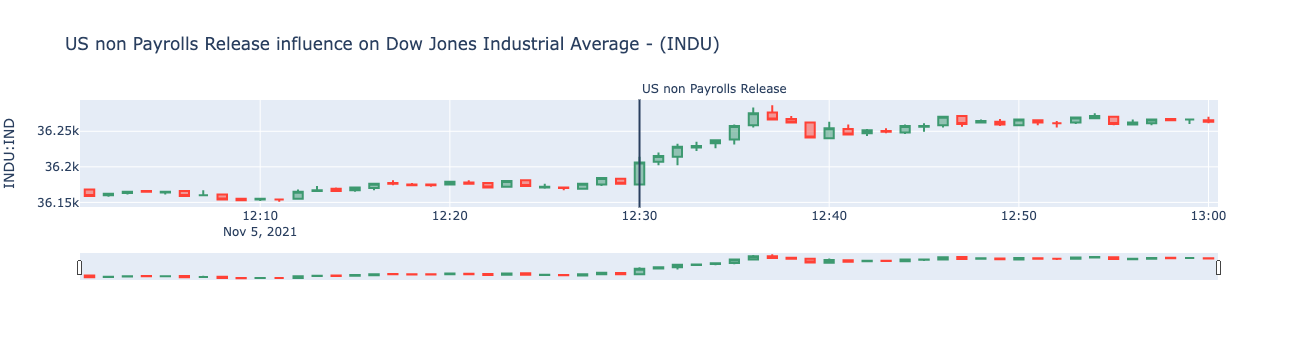

In [45]:

df8 = indu_intraday_november[475:535]

fig = go.Figure(data=[go.Candlestick(x=df8['Date'],
                open=df8['Open'], high=df8['High'],
                low=df8['Low'], close=df8['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on Dow Jones Industrial Average - (INDU)',
    yaxis_title='INDU:IND',
    shapes = [dict(
        x0='2021-11-05T12:30:00', x1='2021-11-05T12:30:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-11-05T12:30:00', y=1.20, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

### S&P 500 Reaction

In [46]:
s_p_intraday_november = te.getMarketsIntraday(symbols = ['SPX:IND'], initDate='2021-11-05', endDate='2021-11-06', output_type = 'df')

In [47]:
s_p_intraday_november.query('Date == "2021-11-05T12:00:00"')

,Symbol,Date,Open,High,Low,Close
535,SPX:IND,2021-11-05T12:00:00,4692.25977,4692.50977,4692.00977,4692.25977


In [48]:
s_p_intraday_november.query('Date == "2021-11-05T13:00:00"')

,Symbol,Date,Open,High,Low,Close
475,SPX:IND,2021-11-05T13:00:00,4701.77979,4702.52979,4701.02979,4701.52979


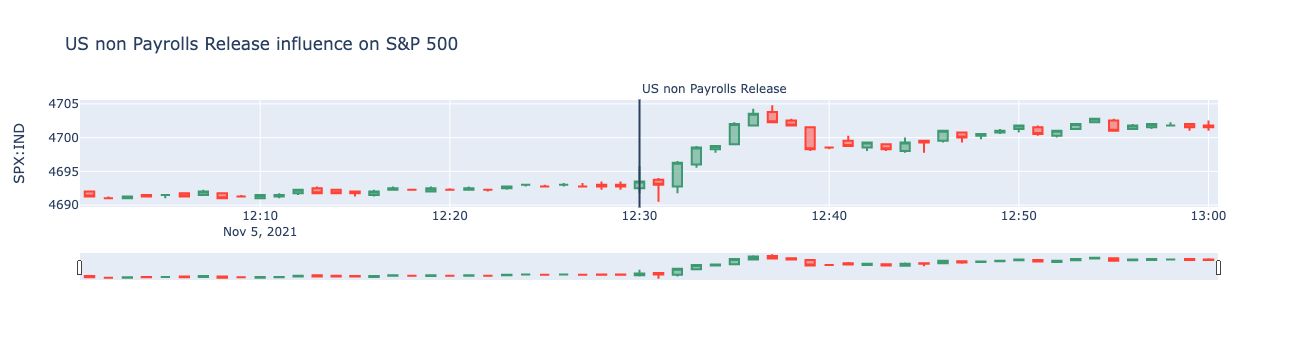

In [49]:

df9 = s_p_intraday_november[475:535]

fig = go.Figure(data=[go.Candlestick(x=df9['Date'],
                open=df9['Open'], high=df9['High'],
                low=df9['Low'], close=df9['Close'])
                      ])

fig.update_layout(
    title='US non Payrolls Release influence on S&P 500',
    yaxis_title='SPX:IND',
    shapes = [dict(
        x0='2021-11-05T12:30:00', x1='2021-11-05T12:30:00', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-11-05T12:30:00', y=1.20, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US non Payrolls Release')]
)

fig.show(renderer='plotly_mimetype')

In [ ]:
# tennessee.matos@tradingeconomics.com 